In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "mCznOep9anOWQeKkd53NW9Dr9"
Consumer_Secret_Key = "M7qRyA1VVYSepifWOZmB3mMOMG8sqWGdPl7PrCTi8e6cWCWwUe" 
Access_Token = "1592194033363087361-EaVKFea037FXvwef1JyVrjOJSGYsaL"
Access_Token_Secret = "WnmqRre9Q8Trl5xXxJEEolc8nSsEkdqxabPt6mdvJnF9P"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [4]:
posts = api.user_timeline(screen_name="tokopedia", count = 1000, lang = "id", tweet_mode = "extended")

# Print the last 5 tweets
print("Show the 5 recent:\n")
i=1
for tweet in posts[:5]:
  print(str(i)+') '+tweet.full_text +'\n')
  i = i+1

Show the 5 recent:

1) @Poconggg Disaranin buat beli deodorant di Tokopedia kak 😉

2) RT @tokopedia: Mau Gadget baru???👀
Spill dong ke Minto, nanti Minto kasih #SaldoKaget nih!🤩🎉

Ikutin caranya di bawah yaaa!~

#TukarTambahH…

3) @FajarMahendra_ @pacar_you Wkwkwk nemuuu ajaaa dahh 🤣👏

4) @mafiaagh @im_azzurii @pacar_you Yokk casting director angkut dah

5) @RizkyWahda @im_azzurii @pacar_you Nahh sepakat sama kakaknya 🙌



In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,@Poconggg Disaranin buat beli deodorant di Tok...
1,RT @tokopedia: Mau Gadget baru???👀\nSpill dong...
2,@FajarMahendra_ @pacar_you Wkwkwk nemuuu ajaaa...
3,@mafiaagh @im_azzurii @pacar_you Yokk casting ...
4,@RizkyWahda @im_azzurii @pacar_you Nahh sepaka...


In [7]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\S+', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,Disaranin buat beli deodorant di Tokopedia kak 😉
1,": Mau Gadget baru???👀\nSpill dong ke Minto, na..."
2,_ _you Wkwkwk nemuuu ajaaa dahh 🤣👏
3,_azzurii _you Yokk casting director angkut dah
4,_azzurii _you Nahh sepakat sama kakaknya 🙌
...,...
195,ihhh so sweet 😍
196,Beuhh emang enak sehh nyanyi pakai mic ini 😍
197,Tapi udah mempelajari cara ngambil angle kame...
198,_ Biar work lyfe belen ya kak 😁


In [8]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Disaranin buat beli deodorant di Tokopedia kak 😉,0.00,0.00
1,": Mau Gadget baru???👀\nSpill dong ke Minto, na...",0.00,0.00
2,_ _you Wkwkwk nemuuu ajaaa dahh 🤣👏,0.00,0.00
3,_azzurii _you Yokk casting director angkut dah,0.00,0.00
4,_azzurii _you Nahh sepakat sama kakaknya 🙌,0.00,0.00
...,...,...,...
195,ihhh so sweet 😍,0.65,0.35
196,Beuhh emang enak sehh nyanyi pakai mic ini 😍,0.00,0.00
197,Tapi udah mempelajari cara ngambil angle kame...,0.00,0.00
198,_ Biar work lyfe belen ya kak 😁,0.00,0.00


<function matplotlib.pyplot.show(*args, **kw)>

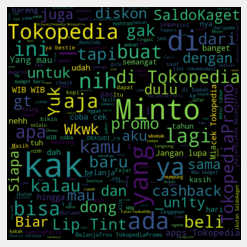

In [9]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=700, height=700, random_state=10, max_font_size=100).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [10]:
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Disaranin buat beli deodorant di Tokopedia kak 😉,0.00,0.00,Neutral
1,": Mau Gadget baru???👀\nSpill dong ke Minto, na...",0.00,0.00,Neutral
2,_ _you Wkwkwk nemuuu ajaaa dahh 🤣👏,0.00,0.00,Neutral
3,_azzurii _you Yokk casting director angkut dah,0.00,0.00,Neutral
4,_azzurii _you Nahh sepakat sama kakaknya 🙌,0.00,0.00,Neutral
...,...,...,...,...
195,ihhh so sweet 😍,0.65,0.35,Positive
196,Beuhh emang enak sehh nyanyi pakai mic ini 😍,0.00,0.00,Neutral
197,Tapi udah mempelajari cara ngambil angle kame...,0.00,0.00,Neutral
198,_ Biar work lyfe belen ya kak 😁,0.00,0.00,Neutral


In [11]:
print('Printing negative tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

6)  Warnanya yang pink kak? 😜

7) @_senimangila _RedsIndo Sorry g dulu 😁✌

8)   Apa prestasi ini ada kaitannya dengan Fajar sad boy kak? 😁✌



In [12]:
print('Printing positive tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

199) _you Fajar selalu bikin mood Minto naikk. Love uu Fajar

200) : Focallure Jelly Clear Dewy Lip Tint✨


201) : Rekomendasi Lip Tint viral buat New Year dinner bareng Ayang 💕💕

✨A Thread✨

DilayaniTokopedia BelanjaTros RacunTokped ht…

202) Stay safe untuk Carat-deul yang nonton konser BeTheSunInJakarta hari iniii! Jangan lupa siapin ponco atau payung kecil, makan yang cukup juga supaya tetep berenergi❤️❤️ tokopedia tokopediachingu

203) Focallure Jelly Clear Dewy Lip Tint✨


204) Rekomendasi Lip Tint viral buat New Year dinner bareng Ayang 💕💕

✨A Thread✨

DilayaniTokopedia BelanjaTros RacunTokped 

205) Special buat warga Palembang! 

Gebyar Promo Akhir Tahun!
Selalu ada promo Kebutuhan Harian, Hobi, hingga Gadget di bulan Desember. Mulai dari 5rb-an + Cashback s.d 200rb!

Cus belanja di sini&gt; 

RGXPalembang BelanjaTros TokopediaPromo KTPPalembang

206)  Halo Toppers, Cek DM yuk Kak:)

207)  Stay safe ya kak 🤗

208) _hendri_  _Jafar Kayaknya agak sulit

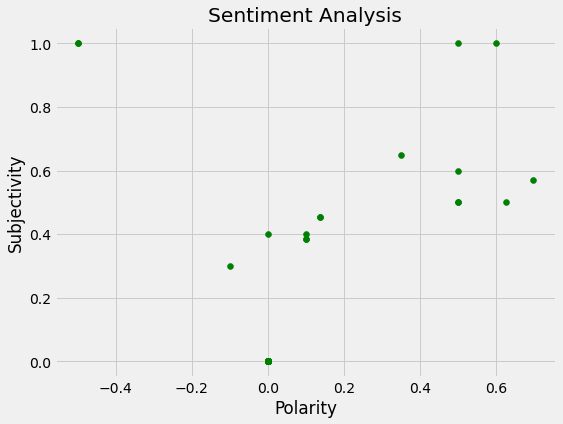

In [13]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Green')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [14]:
df['Analysis'].value_counts()

Neutral     184
Positive     13
Negative      3
Name: Analysis, dtype: int64

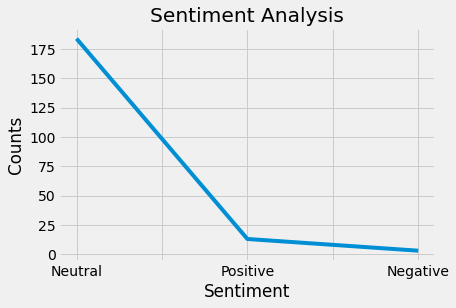

In [15]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='line')
plt.show()

In [16]:
df['Analysis'].value_counts()

Neutral     184
Positive     13
Negative      3
Name: Analysis, dtype: int64

In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweets        200 non-null    object 
 1   Subjectivity  200 non-null    float64
 2   Polarity      200 non-null    float64
 3   Analysis      200 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


,Subjectivity,Polarity
count,200.000000,200.000000
mean,0.050486,0.018726
std,0.180262,0.120024
min,0.000000,-0.500000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,0.697545


In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

Tweets          0
Subjectivity    0
Polarity        0
Analysis        0
dtype: int64

In [20]:
df.dtypes

Tweets           object
Subjectivity    float64
Polarity        float64
Analysis         object
dtype: object

In [21]:
df.corr()

,Subjectivity,Polarity
Subjectivity,1.000000,0.432038
Polarity,0.432038,1.000000


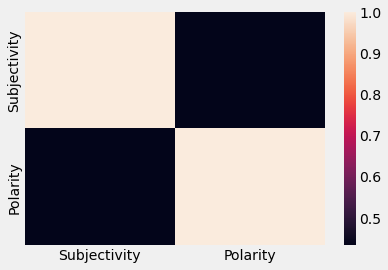

In [22]:
sns.heatmap(df.corr())